# Viz

In [2]:
import os
import sys

root_dir = "NYU_DL_Sys_Project"
cur_dir = os.getcwd().split("/")[-1]
while cur_dir != root_dir:
    os.chdir("..")
    cur_dir = os.getcwd().split("/")[-1]

In [5]:
import torch
from task_models.text_cls_model import TextCLSLightningModule

In [4]:
ckpt_path = "cached_models/active_learning/vinai/bertweet-covid19-base-cased_random_0/epoch=00-val/f1=0.20.ckpt"

In [7]:
from argparse import Namespace

args = {"backbone_name": "vinai/bertweet-covid19-base-cased", "num_labels": 16, "tokenizer_name": "roberta-base", "load_classifier": None}
args = Namespace(**args)
model = TextCLSLightningModule.load_from_checkpoint(ckpt_path, args=args)

Some weights of the model checkpoint at vinai/bertweet-covid19-base-cased were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-covid19-base-cased

In [9]:
model.net.roberta

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(64001, 768, padding_idx=1)
    (position_embeddings): Embedding(130, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [22]:
import torch
from sklearn.manifold import TSNE 
import pandas as pd
import numpy as np

In [23]:
embeddings = np.load("./viz/feature.npy")
y = np.load("./viz/label.npy")

In [24]:
y

array([ 5,  1,  3,  8,  0,  2, 13,  0, 14,  7,  1,  3, 12,  2,  3,  4,  3,
       12,  0,  9,  9,  0,  0,  8,  6,  1,  1, 11,  7,  9,  2, 13,  0,  4,
        1, 12,  2,  0,  1,  6,  1,  0,  8,  3,  0, 14,  0, 12,  0, 11,  7,
        0,  0,  7, 10,  2,  4,  0,  7, 13,  2, 10,  2,  0,  9,  5,  1,  2,
        7,  0,  5,  1,  3,  3,  1, 14,  3, 14,  0,  5,  7,  0,  5,  5,  0,
        7,  5,  9,  0,  0,  0,  1,  0,  2,  0,  7, 13,  0, 11, 13,  4,  5,
        6,  7,  6, 10, 10,  5,  6,  5,  6,  1,  8,  3,  5,  5,  9,  4,  2,
        3,  6,  0,  0,  2,  9])

In [18]:
tsne = TSNE(n_components=2, init='random', perplexity=30, early_exaggeration=100) 
X_tsne = tsne.fit_transform(embeddings) 
X_tsne_data = np.vstack((X_tsne.T, y)).T 
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class']) 
df_tsne.head()
df_tsne['class'] = df_tsne['class'].astype(int)
df_tsne.to_csv(f"./viz/tsne_test")

/opt/anaconda/envs/310/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [19]:
X_tsne.shape

(125, 2)

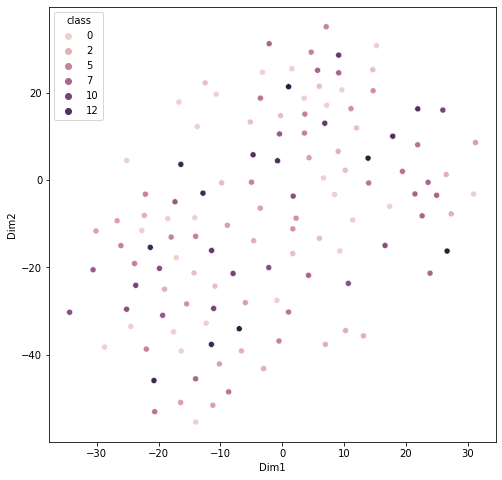

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8)) 
sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2') 
plt.savefig(f"./viz/tsne_test_fig")